NAME :TILU KURIAKOSE
STUDENT ID :KUR22605088

# **Import Necessary Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix

# **Import The Dataset**

In [ ]:
df=pd.read_csv("/content/heart_disease_uci.csv")

# **Read First Few Rows Of the Dataset**

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# **Check The Null Value Of the Dataset**

In [ ]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

# **Clean the Null value Of the Dataset**

In [ ]:
Cleaned_df=df.dropna()

# **Check Null value After Cleaning**

In [ ]:
Cleaned_df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

# **Summary Statistics**

In [ ]:
Cleaned_df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,153.872910,54.521739,131.715719,246.785953,149.327759,1.058528,0.672241,0.946488
std,95.896287,9.030264,17.747751,52.532582,23.121062,1.162769,0.937438,1.230409
min,1.000000,29.000000,94.000000,100.000000,71.000000,0.000000,0.000000,0.000000
25%,75.500000,48.000000,120.000000,211.000000,132.500000,0.000000,0.000000,0.000000
50%,151.000000,56.000000,130.000000,242.000000,152.000000,0.800000,0.000000,0.000000
75%,227.500000,61.000000,140.000000,275.500000,165.500000,1.600000,1.000000,2.000000
max,749.000000,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


# **Exploratory Data Analysis**

#  **What is the age distribution of the participants, and how does it relate to heart disease?**

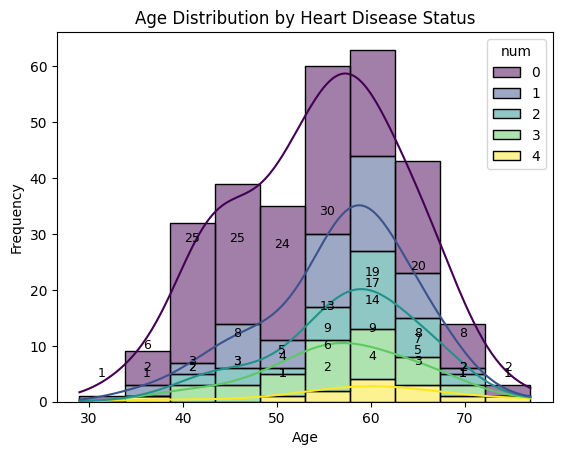

In [ ]:
ax = sns.histplot(data=Cleaned_df, x='age', hue='num', multiple='stack', palette='viridis', kde=True, bins=10)

plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Calculate the counts per age range for each 'num' category and annotate
for p in ax.patches:
    height = p.get_height()
    # Check if the height of the bar is not zero
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,  # Add a small offset above the bar
                f'{int(height)}',
                ha='center',
                va='bottom',
                color='black',
                fontsize=9)

plt.show()

# **How does gender affect the prevalence of heart disease?**

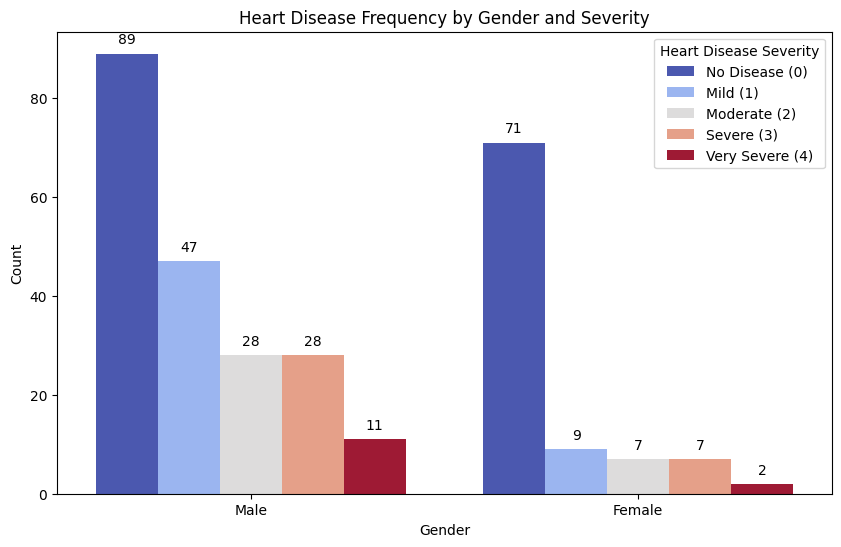

In [ ]:
# plot for Heart Disease Frequency for Gender
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='sex', hue='num', data=Cleaned_df, palette='coolwarm')

# Title and labels
plt.title('Heart Disease Frequency by Gender and Severity')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Heart Disease Severity', labels=['No Disease (0)', 'Mild (1)', 'Moderate (2)', 'Severe (3)', 'Very Severe (4)'])

# Annotate each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with a non-zero height
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


# **What is the distribution of resting blood pressure among patients, and how does it relate to heart disease?**

<ipython-input-10-de61350e5cdc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='num', y='trestbps', data=Cleaned_df, palette='Set2')


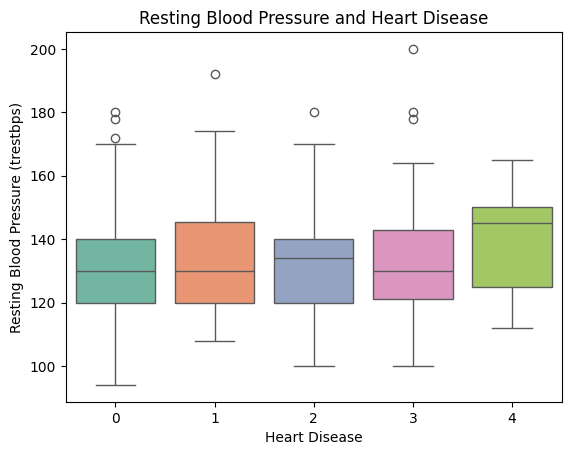

In [ ]:
# Create the boxplot
ax = sns.boxplot(x='num', y='trestbps', data=Cleaned_df, palette='Set2')

plt.title('Resting Blood Pressure and Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Resting Blood Pressure (trestbps)')

# Annotate median values
for patch in ax.artists:
    # Get the x, y coordinates of the median line within each box
    x, y = patch.get_x() + patch.get_width() / 2, patch.get_y() + patch.get_height() / 2
    median = patch.get_bbox().y1 + patch.get_bbox().height / 2.0
    # Place text at the median location
    plt.text(x, median, f'{median:.1f}',
             horizontalalignment='center', verticalalignment='center', fontsize=10, color='white')

plt.show()

# **Does exercise-induced angina (chest pain) have a correlation with heart disease severity?**

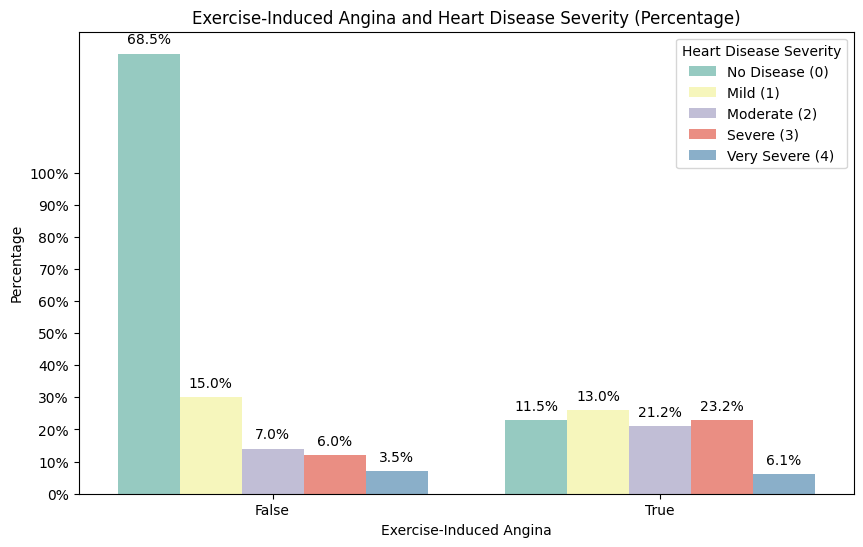

In [ ]:
# Data preparation: convert counts to percentages for plotting
def plot_percentage(data, column, hue):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, hue=hue, data=data, palette='Set3')

    # Title and labels
    plt.title('Exercise-Induced Angina and Heart Disease Severity (Percentage)')
    plt.xlabel('Exercise-Induced Angina')
    plt.ylabel('Percentage')
    plt.legend(title='Heart Disease Severity', labels=['No Disease (0)', 'Mild (1)', 'Moderate (2)', 'Severe (3)', 'Very Severe (4)'])

    # Calculate total counts for each category in `column`
    total_counts = data[column].value_counts().sort_index()

    # Normalize and annotate each bar
    for p in ax.patches:
        group_total = total_counts[int(p.get_x() + p.get_width() / 2)]
        height = p.get_height()
        percentage = height / group_total * 100
        if percentage > 0:  # Skip annotation if percentage is 0
            ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Set y-axis to percentage format
    ax.set_yticks(range(0, 101, 10))
    ax.set_yticklabels([f'{i}%' for i in range(0, 101, 10)])

    plt.show()

# Plotting
plot_percentage(Cleaned_df, 'exang', 'num')

# **What is the proportion of different types of chest pain among patients with heart disease?**

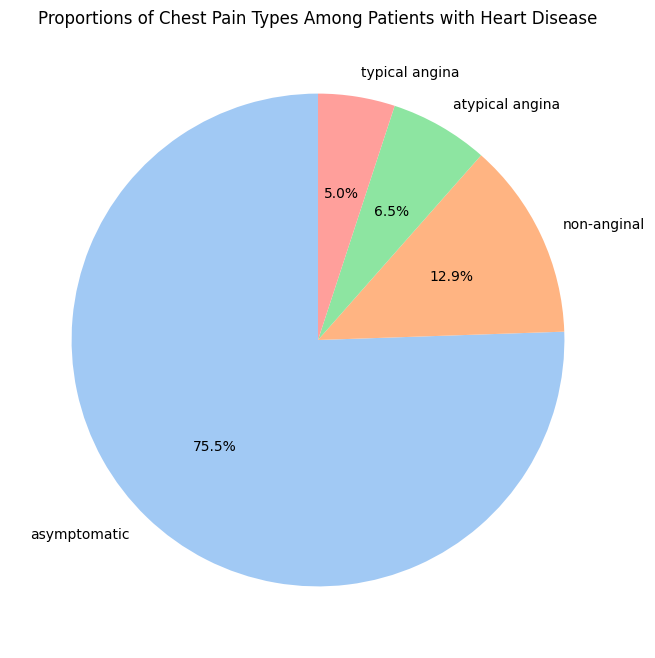

In [ ]:
# Filter the data for individuals with heart disease
heart_disease_df = Cleaned_df[Cleaned_df['num'] > 0]

# Count the frequency of each chest pain type
pain_counts = heart_disease_df['cp'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(pain_counts, labels=pain_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportions of Chest Pain Types Among Patients with Heart Disease')
plt.show()


# **Build The Supervised Model**

# **Feature Extraction**

In [ ]:
# Features and target variable
X = Cleaned_df.drop('num', axis=1)
y = Cleaned_df['num'].apply(lambda x: 1 if x > 0 else 0)
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# **Define The Pipeline**

In [ ]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()
# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(drop='first')  # Drop first to avoid multicollinearity
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])
# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# **Build Logistic Regression**

In [ ]:
# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Preprocess the Data
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
# Model 1: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# **Evaluation Score of Logistic Regression**

In [ ]:
# Evaluation metrics
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_log_reg)
print("Recall:", recall_log_reg)
print("F1 Score:", f1_log_reg)
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Performance:
Accuracy: 0.9
Recall: 0.92
F1 Score: 0.8846153846153846
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91        35
           1       0.85      0.92      0.88        25

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



# **Build Random Forest Classifier and Print the Evaluation Matrics**

In [ ]:
# **Model 2: Random Forest Classifier**
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
# Evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print("Random Forest Performance:")
print("Accuracy:", accuracy_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.9166666666666666
Recall: 0.88
F1 Score: 0.8979591836734694
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        35
           1       0.92      0.88      0.90        25

    accuracy                           0.92        60
   macro avg       0.92      0.91      0.91        60
weighted avg       0.92      0.92      0.92        60



# **Comparison in between both of the Model**

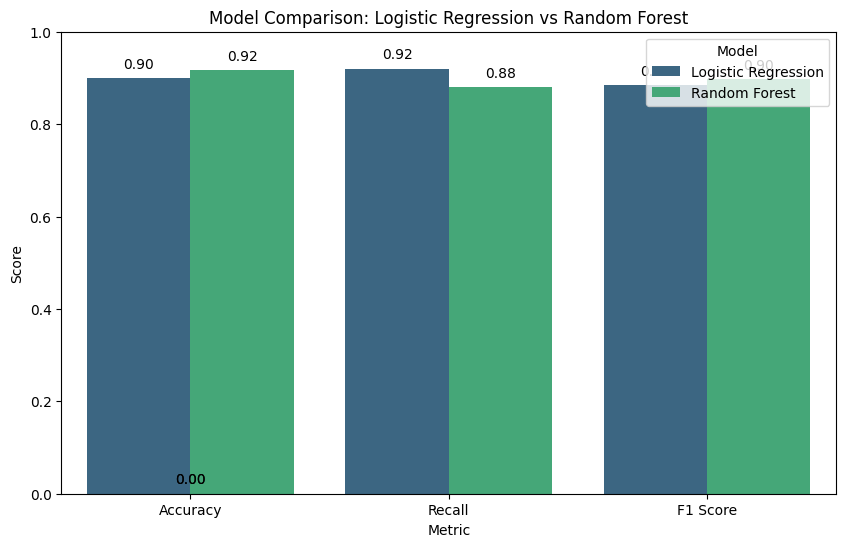

In [ ]:
# Data for comparison
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'F1 Score'],
    'Logistic Regression': [accuracy_log_reg, recall_log_reg, f1_log_reg],
    'Random Forest': [accuracy_rf, recall_rf, f1_rf]
})

# Melt the DataFrame for easier plotting with Seaborn
comparison_melted = comparison.melt(id_vars='Metric', var_name='Model', value_name='Value')

# Plotting the comparison
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=comparison_melted, x='Metric', y='Value', hue='Model', palette='viridis')

# Annotate each bar with the value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, color='black',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Model Comparison: Logistic Regression vs Random Forest')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.show()


# **Confusion Matrix For Logistic Regression**

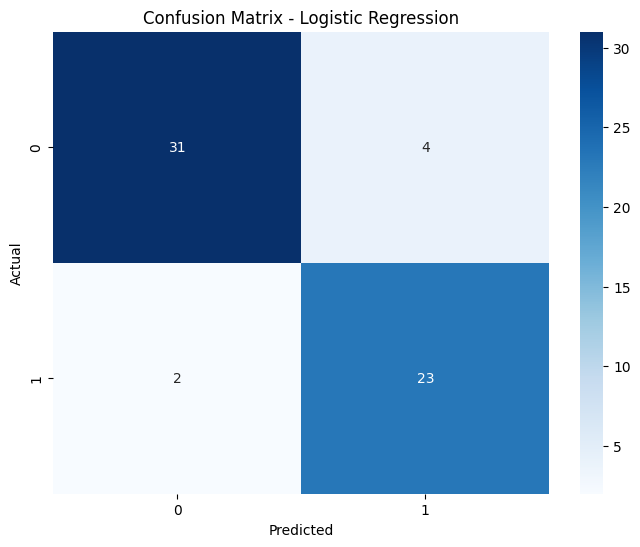

In [ ]:
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Confusion Matrixfor Random Forest**

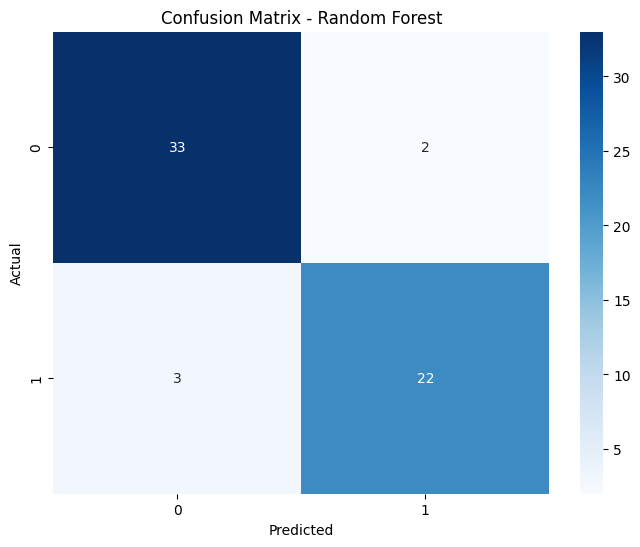

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Build Deep Learning model**

# **CNN Model**

In [ ]:
# Build the CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the CNN model
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_history = cnn_model.fit(X_train[..., np.newaxis], y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the CNN model
cnn_y_pred_prob = cnn_model.predict(X_test[..., np.newaxis])
cnn_y_pred = (cnn_y_pred_prob > 0.5).astype(int)

Epoch 1/50
6/6 [==============================] - 2s 88ms/step - loss: 0.6294 - accuracy: 0.7016 - val_loss: 0.5424 - val_accuracy: 0.7708
Epoch 2/50
6/6 [==============================] - 0s 20ms/step - loss: 0.4735 - accuracy: 0.8063 - val_loss: 0.4840 - val_accuracy: 0.7708
Epoch 3/50
6/6 [==============================] - 0s 21ms/step - loss: 0.3906 - accuracy: 0.8272 - val_loss: 0.4440 - val_accuracy: 0.7917
Epoch 4/50
6/6 [==============================] - 0s 21ms/step - loss: 0.3586 - accuracy: 0.8429 - val_loss: 0.4412 - val_accuracy: 0.8125
Epoch 5/50
6/6 [==============================] - 0s 24ms/step - loss: 0.3384 - accuracy: 0.8534 - val_loss: 0.4379 - val_accuracy: 0.8333
Epoch 6/50
6/6 [==============================] - 0s 25ms/step - loss: 0.3222 - accuracy: 0.8691 - val_loss: 0.4775 - val_accuracy: 0.7917
Epoch 7/50
6/6 [==============================] - 0s 20ms/step - loss: 0.3138 - accuracy: 0.8639 - val_loss: 0.4278 - val_accuracy: 0.8542
Epoch 8/50
6/6 [===========

In [ ]:
# Evaluation Score of the CNN
accuracy_cnn = accuracy_score(y_test, cnn_y_pred)
recall_cnn = recall_score(y_test, cnn_y_pred)
f1_cnn = f1_score(y_test, cnn_y_pred)
print("CNN Performance:")
print("Accuracy:", accuracy_cnn)
print("Recall:", recall_cnn)
print("F1 Score:", f1_cnn)
print("Classification Report:\n", classification_report(y_test, cnn_y_pred))

CNN Performance:
Accuracy: 0.8833333333333333
Recall: 0.84
F1 Score: 0.8571428571428572
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.88      0.84      0.86        25

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



# **Build RNN Model**

In [ ]:
# Build the RNN model
rnn_model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the RNN model
rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
rnn_history = rnn_model.fit(X_train[..., np.newaxis], y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the RNN model
rnn_y_pred_prob = rnn_model.predict(X_test[..., np.newaxis])
rnn_y_pred = (rnn_y_pred_prob > 0.5).astype(int)


Epoch 1/50
6/6 [==============================] - 2s 69ms/step - loss: 0.6735 - accuracy: 0.6335 - val_loss: 0.6599 - val_accuracy: 0.7708
Epoch 2/50
6/6 [==============================] - 0s 16ms/step - loss: 0.6352 - accuracy: 0.7435 - val_loss: 0.6281 - val_accuracy: 0.7708
Epoch 3/50
6/6 [==============================] - 0s 14ms/step - loss: 0.5984 - accuracy: 0.7487 - val_loss: 0.6001 - val_accuracy: 0.7708
Epoch 4/50
6/6 [==============================] - 0s 17ms/step - loss: 0.5512 - accuracy: 0.7749 - val_loss: 0.5732 - val_accuracy: 0.7083
Epoch 5/50
6/6 [==============================] - 0s 13ms/step - loss: 0.4997 - accuracy: 0.7801 - val_loss: 0.6092 - val_accuracy: 0.6875
Epoch 6/50
6/6 [==============================] - 0s 20ms/step - loss: 0.4760 - accuracy: 0.7749 - val_loss: 0.6176 - val_accuracy: 0.7083
Epoch 7/50
6/6 [==============================] - 0s 22ms/step - loss: 0.4647 - accuracy: 0.7853 - val_loss: 0.5864 - val_accuracy: 0.7292
Epoch 8/50
6/6 [===========

# **Evaluation Score**

In [ ]:
accuracy_rnn = accuracy_score(y_test, rnn_y_pred)
recall_rnn = recall_score(y_test, rnn_y_pred)
f1_rnn = f1_score(y_test, rnn_y_pred)
print("RNN Performance:")
print("Accuracy:", accuracy_rnn)
print("Recall:", recall_rnn)
print("F1 Score:", f1_rnn)
print("Classification Report:\n", classification_report(y_test, rnn_y_pred))

RNN Performance:
Accuracy: 0.7666666666666667
Recall: 0.76
F1 Score: 0.7307692307692308
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79        35
           1       0.70      0.76      0.73        25

    accuracy                           0.77        60
   macro avg       0.76      0.77      0.76        60
weighted avg       0.77      0.77      0.77        60



# **Comparison Plot**

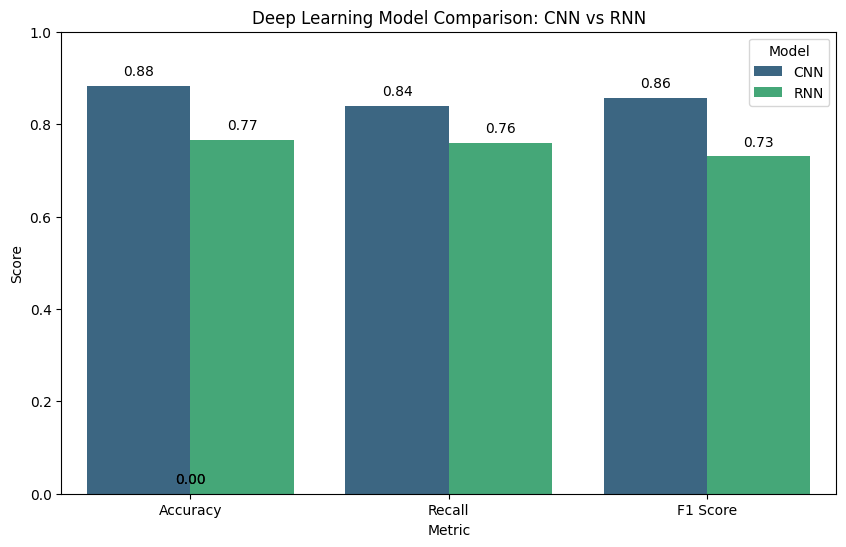

In [ ]:
# Data for comparison
comparison_dl = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'F1 Score'],
    'CNN': [accuracy_cnn, recall_cnn, f1_cnn],
    'RNN': [accuracy_rnn, recall_rnn, f1_rnn]
})

# Melt the DataFrame for easier plotting with Seaborn
comparison_dl_melted = comparison_dl.melt(id_vars='Metric', var_name='Model', value_name='Value')

# Plotting the comparison
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=comparison_dl_melted, x='Metric', y='Value', hue='Model', palette='viridis')

# Annotate each bar with the value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, color='black',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Deep Learning Model Comparison: CNN vs RNN')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.show()


# **ROC Curve for CNN and RNN**

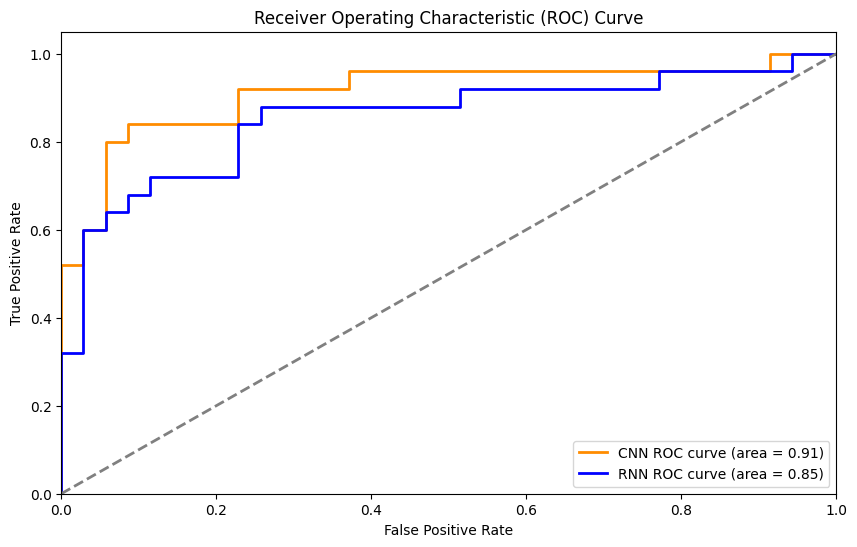

In [ ]:
# Calculate ROC curve and AUC for CNN
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, cnn_y_pred_prob)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)
# Calculate ROC curve and AUC for RNN
fpr_rnn, tpr_rnn, _ = roc_curve(y_test, rnn_y_pred_prob)
roc_auc_rnn = auc(fpr_rnn, tpr_rnn)
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_cnn, tpr_cnn, color='darkorange', lw=2, label='CNN ROC curve (area = %0.2f)' % roc_auc_cnn)
plt.plot(fpr_rnn, tpr_rnn, color='blue', lw=2, label='RNN ROC curve (area = %0.2f)' % roc_auc_rnn)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# **Confusion Matrix For CNN**

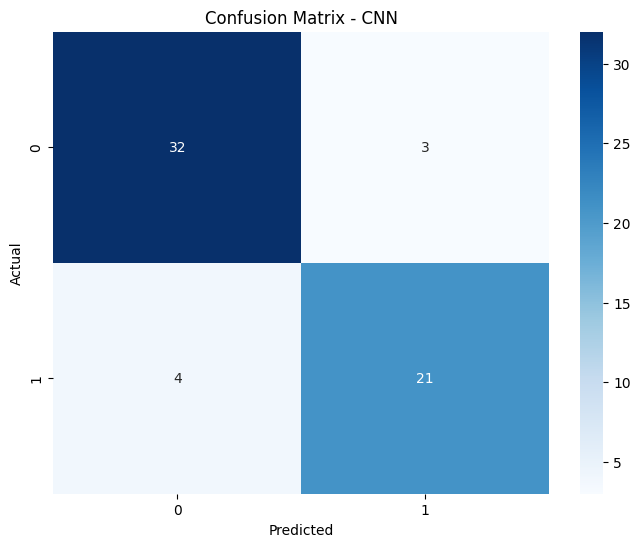

In [ ]:
cm_cnn = confusion_matrix(y_test, cnn_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - CNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **Confusion Matrix for RNN**

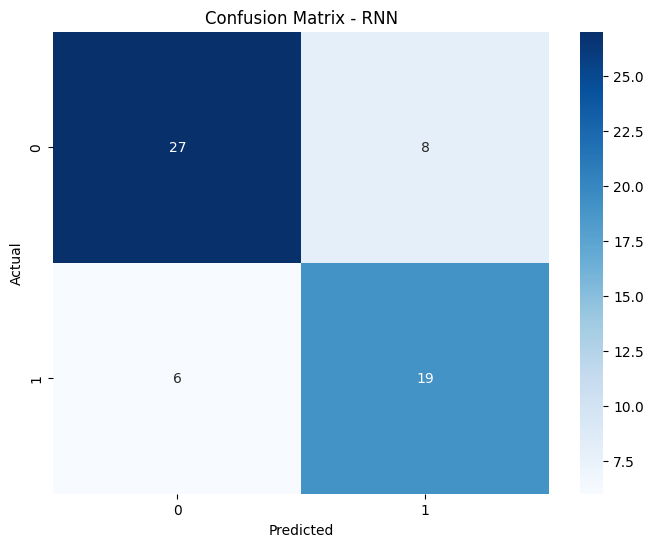

In [ ]:
cm_rnn = confusion_matrix(y_test, rnn_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - RNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()